In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load CSV ---
df = pd.read_csv(r"C:\Users\User\Downloads\BNBUSDT.csv")

# --- Safely parse timestamps (handle mixed formats gracefully) ---
df['Open Time'] = pd.to_datetime(df['Open Time'], errors='coerce', utc=True)
df['Close Time'] = pd.to_datetime(df['Close Time'], errors='coerce', utc=True)

# --- Drop rows with unparsed times if necessary ---
df.dropna(subset=['Open Time', 'Close Time'], inplace=True)

# --- Rename columns to lowercase for compatibility with strategy code ---
df.rename(columns={
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close',
    'Volume': 'volume'
}, inplace=True)

# --- Sort and reset index ---
df = df.sort_values('Open Time').reset_index(drop=True)

# --- Set datetime index ---
df.set_index('Open Time', inplace=True)

df


,open,high,low,close,volume,Close Time,Quote Asset Volume,Number of Trades,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Ticker
Open Time,,,,,,,,,,,
2019-12-01 00:00:00+00:00,15.7030,15.7139,15.6500,15.6747,6413.480,2019-12-01 00:04:59.999000+00:00,1.004906e+05,123,4484.230,70261.636824,BNBUSDT
2019-12-01 00:05:00+00:00,15.6663,15.6846,15.6306,15.6408,2992.330,2019-12-01 00:09:59.999000+00:00,4.686540e+04,108,1763.080,27622.963409,BNBUSDT
2019-12-01 00:10:00+00:00,15.6380,15.6425,15.5609,15.6065,5107.040,2019-12-01 00:14:59.999000+00:00,7.968463e+04,235,4105.210,64059.404933,BNBUSDT
2019-12-01 00:15:00+00:00,15.6206,15.6365,15.5716,15.5783,5953.330,2019-12-01 00:19:59.999000+00:00,9.289066e+04,143,3174.710,49548.221529,BNBUSDT
2019-12-01 00:20:00+00:00,15.5787,15.6118,15.5600,15.6063,4567.410,2019-12-01 00:24:59.999000+00:00,7.117059e+04,126,3539.790,55160.189326,BNBUSDT
...,...,...,...,...,...,...,...,...,...,...,...
2025-05-09 23:40:00+00:00,665.7600,666.5500,663.8000,665.6700,2967.312,2025-05-09 23:44:59.999000+00:00,1.973695e+06,7276,1398.144,930104.770310,BNBUSDT
2025-05-09 23:45:00+00:00,665.6800,667.4700,665.3400,666.5100,2004.280,2025-05-09 23:49:59.999000+00:00,1.336400e+06,4787,722.962,482050.344920,BNBUSDT
2025-05-09 23:50:00+00:00,666.5100,666.8400,665.5700,666.6700,1683.240,2025-05-09 23:54:59.999000+00:00,1.121569e+06,5266,827.690,551500.049410,BNBUSDT


C:\Users\User\AppData\Local\Temp\ipykernel_26360\1213766251.py:53: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df_bt['Position'] = df_bt['Position'].replace(to_replace=0, method='ffill')


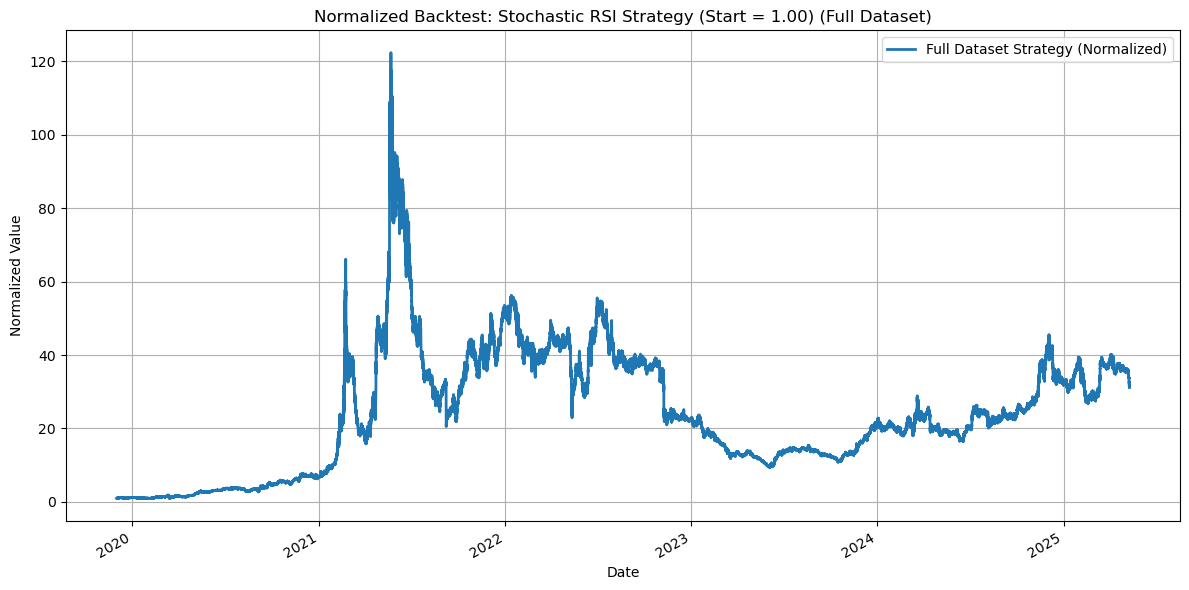


Strategy Performance Summary (Full Dataset):

| Metric            |   Metric Value (Full Dataset) |
|:------------------|------------------------------:|
| Sharpe Ratio      |                        1.2221 |
| Max Drawdown (%)  |                      -92.32   |
| Signal Count (1)  |                   104678      |
| Signal Count (-1) |                   160320      |
| Signal Count (0)  |                   249773      |


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- RSI using Wilder's EMA ---
def compute_rsi_wilder(series, period=14):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.ewm(alpha=1/period, adjust=False).mean()
    avg_loss = loss.ewm(alpha=1/period, adjust=False).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# --- Stochastic RSI with EMA smoothing ---
def compute_stoch_rsi_ema(price_series, rsi_period=14, stoch_period=14, k_smooth=3, d_smooth=3):
    rsi = compute_rsi_wilder(price_series, rsi_period)
    min_rsi = rsi.rolling(window=stoch_period).min()
    max_rsi = rsi.rolling(window=stoch_period).max()
    stoch_rsi = (rsi - min_rsi) / (max_rsi - min_rsi)
    k = stoch_rsi.ewm(span=k_smooth, adjust=False).mean() * 100
    d = k.ewm(span=d_smooth, adjust=False).mean()
    return rsi, stoch_rsi, k, d

# --- Apply indicator calculations ---
df['RSI'], df['StochRSI'], df['%K'], df['%D'] = compute_stoch_rsi_ema(df['close'])

# --- Signal Generation ---
df['Signal'] = 0

bullish_crossover = (df['%K'].shift(1) < df['%D'].shift(1)) & (df['%K'] > df['%D'])
bearish_crossover = (df['%K'].shift(1) > df['%D'].shift(1)) & (df['%K'] < df['%D'])

oversold_k = df['%K'] < 10
overbought_k = df['%K'] > 80

buy_signal = bullish_crossover | oversold_k
sell_signal = bearish_crossover | overbought_k

df.loc[buy_signal, 'Signal'] = 1
df.loc[sell_signal, 'Signal'] = -1
df.loc[buy_signal & sell_signal, 'Signal'] = 0  

# --- Backtest Function (Option A logic) ---
def run_backtest(df, label='Full Dataset', bars_per_day=288):
    df_bt = df[['close', 'Signal']].dropna().copy()

    # Step 1: Create position column from signal
    df_bt['Position'] = 0
    df_bt.loc[df_bt['Signal'] == 1, 'Position'] = 1
    df_bt.loc[df_bt['Signal'] == -1, 'Position'] = -1
    df_bt['Position'] = df_bt['Position'].replace(to_replace=0, method='ffill')

    # Step 2: Calculate returns
    df_bt['Returns'] = df_bt['close'].pct_change()
    df_bt['Strategy_Returns'] = df_bt['Returns'] * df_bt['Position'].shift(1)
    df_bt['Normalized_Strategy'] = (1 + df_bt['Strategy_Returns'].fillna(0)).cumprod()

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(df_bt.index, df_bt['Normalized_Strategy'], label=f'{label} Strategy (Normalized)', linewidth=2)
    plt.title(f"Normalized Backtest: Stochastic RSI Strategy (Start = 1.00) ({label})")
    plt.xlabel("Date")
    plt.ylabel("Normalized Value")
    plt.legend()
    plt.grid(True)
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    plt.show()

    # Metrics
    df_bt['Cumulative_Strategy'] = (1 + df_bt['Strategy_Returns'].fillna(0)).cumprod()
    excess_returns = df_bt['Strategy_Returns'].fillna(0)
    sharpe_ratio = np.sqrt(bars_per_day * 365) * excess_returns.mean() / excess_returns.std()
    df_bt['Peak'] = df_bt['Cumulative_Strategy'].cummax()
    df_bt['Drawdown'] = (df_bt['Cumulative_Strategy'] - df_bt['Peak']) / df_bt['Peak']
    max_drawdown = df_bt['Drawdown'].min()
    signal_counts = df_bt['Signal'].value_counts().to_dict()

    # Summary
    performance_summary = {
        'Sharpe Ratio': round(sharpe_ratio, 4),
        'Max Drawdown (%)': round(max_drawdown * 100, 2),
        'Signal Count (1)': signal_counts.get(1, 0),
        'Signal Count (-1)': signal_counts.get(-1, 0),
        'Signal Count (0)': signal_counts.get(0, 0)
    }
    summary_df = pd.DataFrame.from_dict(performance_summary, orient='index', columns=[f'Metric Value ({label})'])
    summary_df.index.name = 'Metric'
    print(f"\nStrategy Performance Summary ({label}):\n")
    print(summary_df.to_markdown())
    return df_bt

# --- Run Backtest ---
df_bt = run_backtest(df, label="Full Dataset", bars_per_day=288)  # adjust bars_per_day based on your timeframe


In [15]:
def classify_signal_source(row):
    if row['Signal'] == 1 and row['%K'] < 10 and (row['%K'] > row['%D']):
        return 'Both Buy'
    elif row['Signal'] == -1 and row['%K'] > 80 and (row['%K'] < row['%D']):
        return 'Both Sell'
    elif row['Signal'] == 1 and row['%K'] < 10:
        return 'K < 10'
    elif row['Signal'] == -1 and row['%K'] > 80:
        return 'K > 80'
    elif row['Signal'] != 0:
        return 'Cross'
    else:
        return 'None'

df['Signal_Source'] = df.apply(classify_signal_source, axis=1)

# --- Show last 60 rows with relevant columns ---
print("\nLast 60 rows of signal + indicator activity:\n")
display_cols = ['close', '%K', '%D', 'RSI', 'Signal', 'Signal_Source']
print(df[display_cols].tail(60).to_string())



Last 60 rows of signal + indicator activity:

                            close         %K         %D        RSI  Signal Signal_Source
Open Time                                                                               
2025-05-09 19:05:00+00:00  636.51  76.534889  58.475478  57.086130       0          None
2025-05-09 19:10:00+00:00  635.80  38.267444  48.371461  51.058249      -1         Cross
2025-05-09 19:15:00+00:00  635.86  22.997774  35.684618  51.524090       0          None
2025-05-09 19:20:00+00:00  635.60  11.498887  23.591752  49.332796       0          None
2025-05-09 19:25:00+00:00  635.86  20.059271  21.825512  51.551773       0          None
2025-05-09 19:30:00+00:00  635.60  10.029635  15.927573  49.229895       0          None
2025-05-09 19:35:00+00:00  635.58   5.014818  10.471196  49.046896       1        K < 10
2025-05-09 19:40:00+00:00  635.59   3.140450   6.805823  49.148679       1        K < 10
2025-05-09 19:45:00+00:00  635.30   1.570225   4.188024  46.262